C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

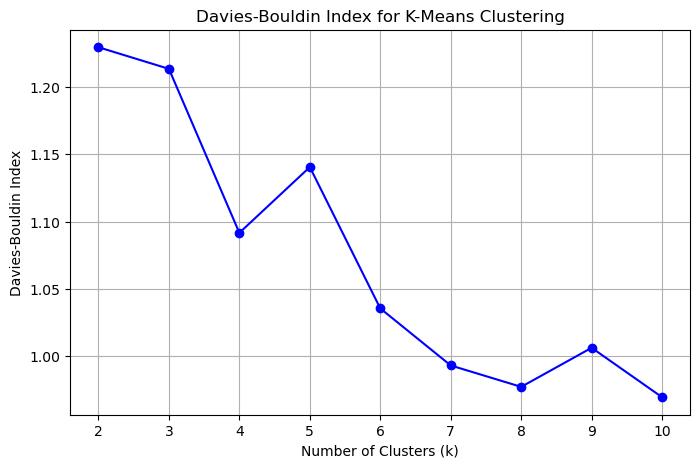

C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


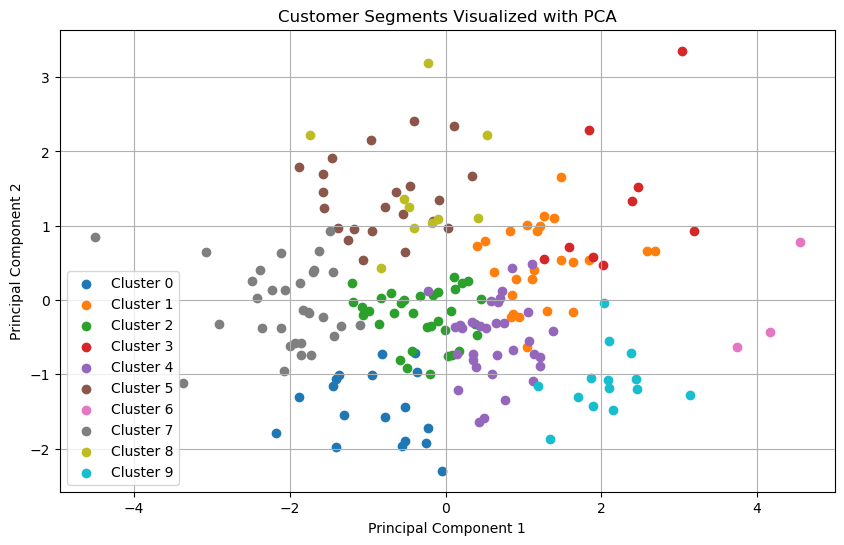

In [2]:
import pandas as pd

# Load the data files
customers_file = "C:/Users/laasya/OneDrive/Desktop/data science/Customers.csv"
transactions_file = "C:/Users/laasya/OneDrive/Desktop/data science/Transactions.csv"

# Read CSV files
customers_data = pd.read_csv(customers_file)
transactions_data = pd.read_csv(transactions_file)

# Display the first few rows of each dataset to understand their structure
customers_data.head(), transactions_data.head()

# Merge datasets on CustomerID
merged_data = pd.merge(transactions_data, customers_data, on="CustomerID")

# Feature engineering: Aggregate transaction data for each customer
agg_data = merged_data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],  # Total spend, average spend
    "TransactionID": "count",       # Number of transactions
    "TransactionDate": "min"        # First transaction date
}).reset_index()

# Flatten MultiIndex columns
agg_data.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TransactionCount", "FirstTransactionDate"]

# Calculate customer tenure (days since first transaction)
agg_data["FirstTransactionDate"] = pd.to_datetime(agg_data["FirstTransactionDate"])
agg_data["Tenure"] = (pd.Timestamp.now() - agg_data["FirstTransactionDate"]).dt.days

# Add region from customer data
agg_data = pd.merge(agg_data, customers_data[["CustomerID", "Region"]], on="CustomerID")

# Prepare data for clustering (drop categorical and unnecessary columns)
clustering_data = agg_data.drop(columns=["CustomerID", "FirstTransactionDate", "Region"])

# Display the processed data
agg_data.head(), clustering_data.head()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering for 2 to 10 clusters and calculate DB index
db_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    db_index = davies_bouldin_score(clustering_data_scaled, labels)
    db_indices.append(db_index)

# Plot DB index for different cluster numbers
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, db_indices, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Identify the optimal number of clusters (lowest DB index)
optimal_k = cluster_range[db_indices.index(min(db_indices))]
optimal_k, min(db_indices)

from sklearn.decomposition import PCA

# Perform K-Means clustering with optimal k
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_labels = optimal_kmeans.fit_predict(clustering_data_scaled)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        pca_result[optimal_labels == cluster, 0],
        pca_result[optimal_labels == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()



In [3]:
import pandas as pd

# Load the data files
customers_file = "C:/Users/laasya/OneDrive/Desktop/data science/Customers.csv"
transactions_file = "C:/Users/laasya/OneDrive/Desktop/data science/Transactions.csv"

# Read CSV files
customers_data = pd.read_csv(customers_file)
transactions_data = pd.read_csv(transactions_file)

# Display the first few rows of each dataset to understand their structure
customers_data.head(), transactions_data.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

In [4]:
# Merge datasets on CustomerID
merged_data = pd.merge(transactions_data, customers_data, on="CustomerID")

# Feature engineering: Aggregate transaction data for each customer
agg_data = merged_data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],  # Total spend, average spend
    "TransactionID": "count",       # Number of transactions
    "TransactionDate": "min"        # First transaction date
}).reset_index()

# Flatten MultiIndex columns
agg_data.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TransactionCount", "FirstTransactionDate"]

# Calculate customer tenure (days since first transaction)
agg_data["FirstTransactionDate"] = pd.to_datetime(agg_data["FirstTransactionDate"])
agg_data["Tenure"] = (pd.Timestamp.now() - agg_data["FirstTransactionDate"]).dt.days

# Add region from customer data
agg_data = pd.merge(agg_data, customers_data[["CustomerID", "Region"]], on="CustomerID")

# Prepare data for clustering (drop categorical and unnecessary columns)
clustering_data = agg_data.drop(columns=["CustomerID", "FirstTransactionDate", "Region"])

# Display the processed data
agg_data.head(), clustering_data.head()


(  CustomerID  TotalSpend  AverageSpend  TransactionCount FirstTransactionDate  \
 0      C0001     3354.52       670.904                 5  2024-01-19 03:12:55   
 1      C0002     1862.74       465.685                 4  2024-02-28 07:44:21   
 2      C0003     2725.38       681.345                 4  2024-02-18 02:50:37   
 3      C0004     5354.88       669.360                 8  2024-02-28 10:16:35   
 4      C0005     2034.24       678.080                 3  2024-03-15 04:08:59   
 
    Tenure         Region  
 0     372  South America  
 1     332           Asia  
 2     342  South America  
 3     332  South America  
 4     316           Asia  ,
    TotalSpend  AverageSpend  TransactionCount  Tenure
 0     3354.52       670.904                 5     372
 1     1862.74       465.685                 4     332
 2     2725.38       681.345                 4     342
 3     5354.88       669.360                 8     332
 4     2034.24       678.080                 3     316)

C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\laasya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

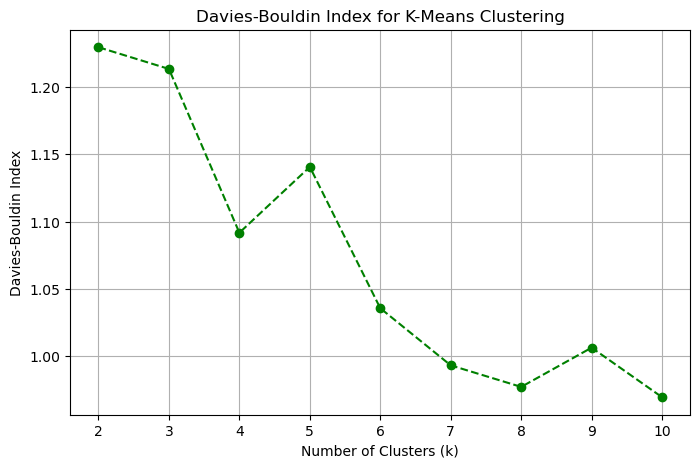

(10, 0.969440820590384)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering for 2 to 10 clusters and calculate DB index
db_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    db_index = davies_bouldin_score(clustering_data_scaled, labels)
    db_indices.append(db_index)

# Plot DB index for different cluster numbers
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, db_indices, marker='o', linestyle='--', color='g')
plt.title('Davies-Bouldin Index for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Identify the optimal number of clusters (lowest DB index)
optimal_k = cluster_range[db_indices.index(min(db_indices))]
optimal_k, min(db_indices)
